In [1]:
import csv
fileName='날씨정보.csv'
data = []
f = open('c:/Users/bluecom011/Desktop/2주차/0103/'+fileName, 'r',encoding='utf-8') #저장경로 이렇게 할수 있음
#reader = csv.reader(f)
reader=csv.reader(f,delimiter=',') #tab으로 구분되어있는법을 읽는법
for row in reader:
    data.append(row)
f.close()
data[:3] #위에 컬럼 3줄만 보기



[['지점명', '관측시간', '최고기온', '최저기온', '강수량'],
 ['서울', '2023-01-01', '3.8', '-4.3', ''],
 ['서울', '2023-01-02', '-0.4', '-7.4', '']]

Text(0.5, 1.0, '가나다')

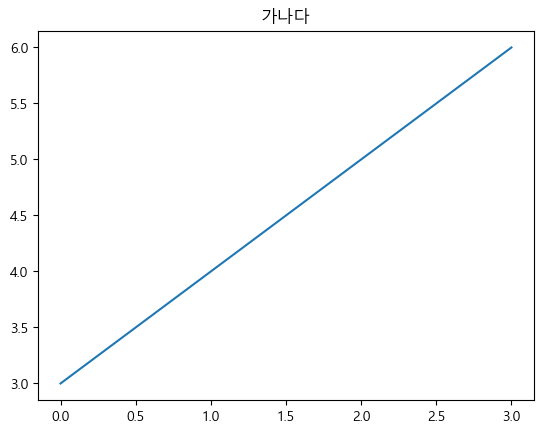

In [2]:
import matplotlib.pyplot as plt
plt.rcParams['font.family'] ='Malgun Gothic'
plt.plot([3,4,5,6])
plt.title('가나다')

무엇을 하고싶은지가 중요...!

함수화 시키기

In [3]:
import csv
def myOpen(fileName, 구분자=','):
    data = []
    f = open('날씨정보.csv', 'r',encoding='utf-8') 
    reader = csv.reader(f)
    #reader=csv.reader(f,delimiter=',') tab으로 구분되어있는법을 읽는법
    for row in reader:
        data.append(row)
    f.close()
    return data
fileName='날씨정보.csv'
dataList=myOpen(fileName)
data[:3] #위에 컬럼 3줄만 보기



[['지점명', '관측시간', '최고기온', '최저기온', '강수량'],
 ['서울', '2023-01-01', '3.8', '-4.3', ''],
 ['서울', '2023-01-02', '-0.4', '-7.4', '']]

In [4]:
#최적화 시킨코드
def myOpen(fileName, 구분자=','):
    with open(fileName, 'r', encoding='utf-8') as f:
        reader = csv.reader(f, delimiter=구분자)
        return list(reader)

fileName = '날씨정보.csv'
dataList = myOpen(fileName)

In [5]:
header=dataList[0] #1번쨰
local=dataList[1:] #두번째부턴 로컬로

In [6]:
#최고기온의 합
sum=0 
for x in local:
    sum+=float(x[3])
sum

-132.20000000000013

In [7]:
import numpy as np
new_num=[]
for x in local:
    new_num.append(float(x[3]))
new_num[:3] # 샘플링하는 습관 들이기
np.sum(new_num, axis=0) #합

print(np.mean(new_num, axis=0)) #평균 출력
print(np.max(new_num, axis=0)) # 최대값

-1.4688888888888887
14.5


In [8]:
#서울 ~30, 부산 31~59, 제주 60:
local[61]

['제주', '2023-01-02', '7.8', '3.7', '']

처음 시작 이걸로 공부하고나서 함수화 고민하기

(0.0, 80.0)

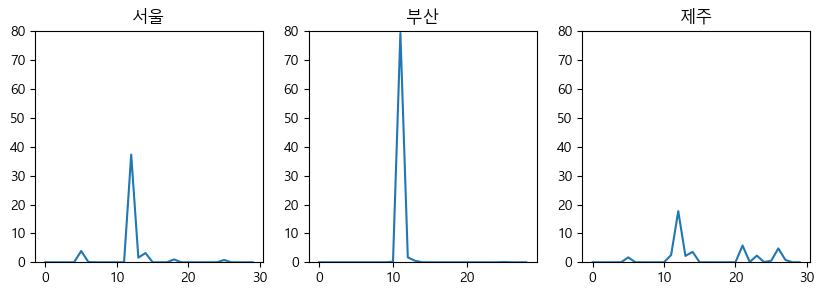

In [9]:
new_num=[]
for x in local:
    if x[4]=='':
        new_num.append(0) #데이터가 빈칸이라면 0을 채운다
    else:
        new_num.append(float(x[4])) #아니라면 그대로출력
import matplotlib.pyplot as plt
서울,부산,제주=new_num[:30],new_num[31:60],new_num[60:]

plt.figure(figsize=(10,3))
plt.subplot(1,3,1)
plt.plot(서울)
plt.title('서울')
plt.ylim([0,80])

plt.subplot(1,3,2)
plt.plot(부산)
plt.title('부산')
plt.ylim([0,80])

plt.subplot(1,3,3) # 나눠서 보기
plt.plot(제주)
plt.title('제주') #제목달기
plt.ylim([0,80])

함수화 시키기

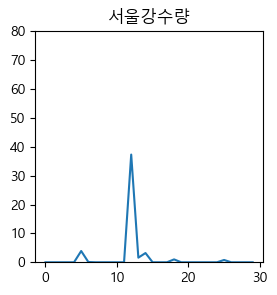

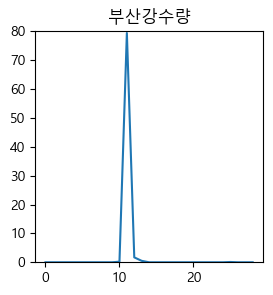

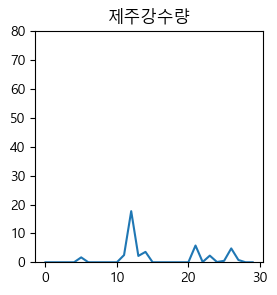

In [10]:
import matplotlib.pyplot as plt

new_num = []
for x in local:
    if x[4] == '':
        new_num.append(0)  # 데이터가 빈칸이라면 0을 채운다
    else:
        new_num.append(float(x[4]))  # 아니라면 그대로 출력

서울, 부산, 제주 = new_num[:30], new_num[31:60], new_num[60:]
def myChart(dataX, title, 위치=1, ymin=0, ymax=80):  # ymin=0, ymax=80 지정가능
    plt.figure(figsize=(10, 3))
    plt.subplot(1, 3, 위치)
    plt.plot(dataX)
    plt.title(title)
    plt.ylim([ymin, ymax])

자료 = [서울, 부산, 제주]
타이틀 = ['서울강수량', '부산강수량', '제주강수량']

cnt = 0
for x, y in zip(자료, 타이틀):
    cnt += 1
    myChart(x, y, cnt)

plt.show()


서울,부산,제주의 강수량 합 구하기

In [11]:
import csv
import matplotlib.pyplot as plt

# 서울, 부산, 제주의 강수량 합 구하기
rainfall_sums = {'서울': 0, '부산': 0, '제주': 0}
total_rainfall_sum=0
for row in dataList[1:]:  # 헤더를 제외하고 데이터만 계산
    region = row[0]
    rainfall = float(row[-1]) if row[-1] else 0
    rainfall_sums[region] += rainfall
    total_rainfall_sum += rainfall

for region, rainfall_sum in rainfall_sums.items():
    print(f"{region}의 강수량 합: {rainfall_sum} mm")

print(f"전체 지역의 강수량 총합: {total_rainfall_sum} mm")

서울의 강수량 합: 47.9 mm
부산의 강수량 합: 81.9 mm
제주의 강수량 합: 42.099999999999994 mm
전체 지역의 강수량 총합: 171.89999999999998 mm


서울의 강수량 합: 95.79999999999998 mm
부산의 강수량 합: 163.79999999999998 mm
제주의 강수량 합: 84.19999999999997 mm


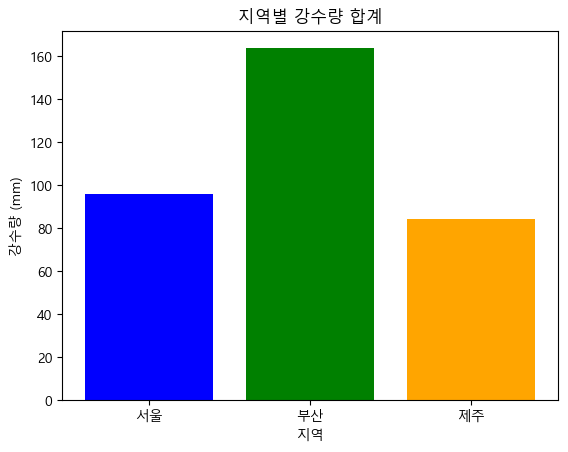

In [12]:
for row in dataList[1:]:  # 헤더를 제외하고 데이터만 계산
    region = row[0]
    rainfall = float(row[-1]) if row[-1] else 0
    rainfall_sums[region] += rainfall

# Print the total rainfall sums
for region, rainfall_sum in rainfall_sums.items():
    print(f"{region}의 강수량 합: {rainfall_sum} mm")

# Visualize the total rainfall sums using a bar chart
regions = list(rainfall_sums.keys())
rainfall_values = list(rainfall_sums.values())

plt.bar(regions, rainfall_values, color=['blue', 'green', 'orange'])
plt.title('지역별 강수량 합계')
plt.xlabel('지역')
plt.ylabel('강수량 (mm)')
plt.show()


In [13]:
import csv
def extract_temperatures(data, region):
    temperatures = {'최고기온': [], '최저기온': []}
    for row in data[1:]:  # 헤더를 제외하고 데이터만 추출
        if row[0] == region:
            temperatures['최고기온'].append(float(row[2]) if row[2] else None)
            temperatures['최저기온'].append(float(row[3]) if row[3] else None)
    return temperatures

fileName = '날씨정보.csv'
dataList = myOpen(fileName)

# 서울, 부산, 제주 지역의 최고기온과 최저기온 추출
seoul_temperatures = extract_temperatures(dataList, '서울')
busan_temperatures = extract_temperatures(dataList, '부산')
jeju_temperatures = extract_temperatures(dataList, '제주')

# 결과 출력
print("서울 지역 최고기온:", seoul_temperatures['최고기온'])
print("서울 지역 최저기온:", seoul_temperatures['최저기온'])
print("\n부산 지역 최고기온:", busan_temperatures['최고기온'])
print("부산 지역 최저기온:", busan_temperatures['최저기온'])
print("\n제주 지역 최고기온:", jeju_temperatures['최고기온'])
print("제주 지역 최저기온:", jeju_temperatures['최저기온'])


서울 지역 최고기온: [3.8, -0.4, 0.6, 3.3, 3.6, 5.7, 3.8, 6.3, 7.0, 9.1, 9.2, 12.5, 10.1, 8.4, 3.8, -1.2, -0.4, 2.2, 4.3, 2.0, 1.5, 2.6, 4.6, -6.9, -5.4, -3.5, -3.8, -0.6, 4.9, 4.2]
서울 지역 최저기온: [-4.3, -7.4, -9.0, -5.7, -5.6, -4.7, -1.4, -3.7, -1.3, -3.9, -2.0, -0.6, 5.1, 3.8, -3.5, -6.8, -7.0, -4.6, -6.0, -7.7, -10.5, -2.8, -6.9, -17.0, -17.3, -9.0, -9.6, -11.2, -8.0, -4.4]

부산 지역 최고기온: [8.7, 6.4, 6.2, 8.1, 8.1, 10.5, 9.2, 12.4, 14.8, 13.5, 14.5, 16.9, 17.2, 14.0, 8.1, 6.1, 5.3, 6.5, 7.2, 7.4, 5.5, 4.2, 11.2, 4.1, -1.0, 3.1, 2.3, 2.1, 7.3, 7.3]
부산 지역 최저기온: [-2.5, -1.8, -3.5, -3.4, -2.5, -1.4, 1.2, -1.7, -0.5, 0.1, 1.0, 1.1, 12.7, 8.1, 0.7, -2.5, -4.0, -2.5, -3.1, -2.8, -6.4, -3.4, -1.5, -11.4, -13.5, -9.5, -6.4, -8.4, -6.1, -2.3]

제주 지역 최고기온: [10.9, 7.8, 8.5, 9.9, 13.4, 12.3, 11.4, 14.6, 16.4, 15.3, 16.7, 17.7, 20.7, 14.5, 9.0, 4.0, 4.9, 7.9, 9.5, 9.8, 5.3, 9.5, 12.0, 5.2, 1.8, 9.6, 6.1, 4.7, 8.3, 9.5]
제주 지역 최저기온: [5.2, 3.7, 4.5, 4.1, 4.2, 5.6, 6.1, 3.8, 6.6, 3.6, 7.1, 7.4, 14.5, 8.9, 3.8, 2.9,

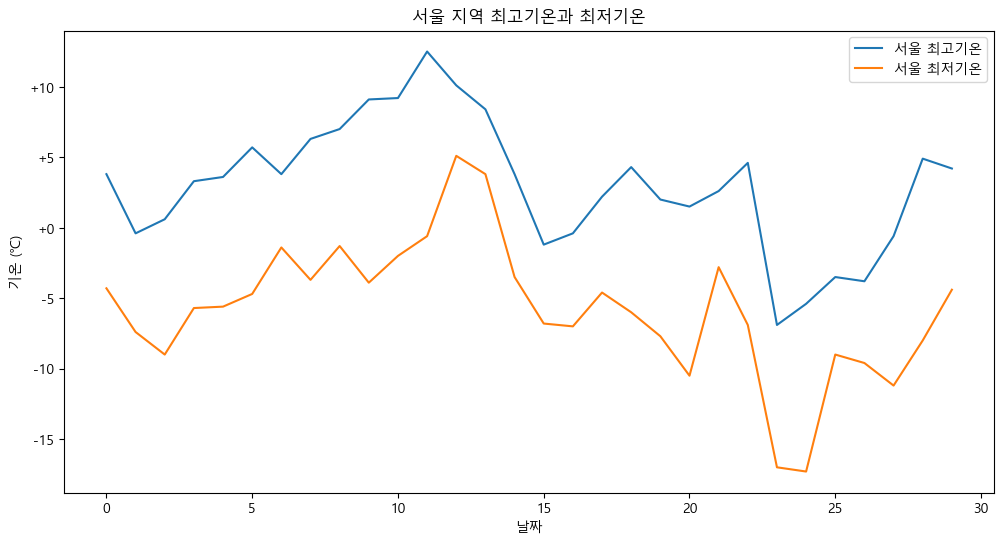

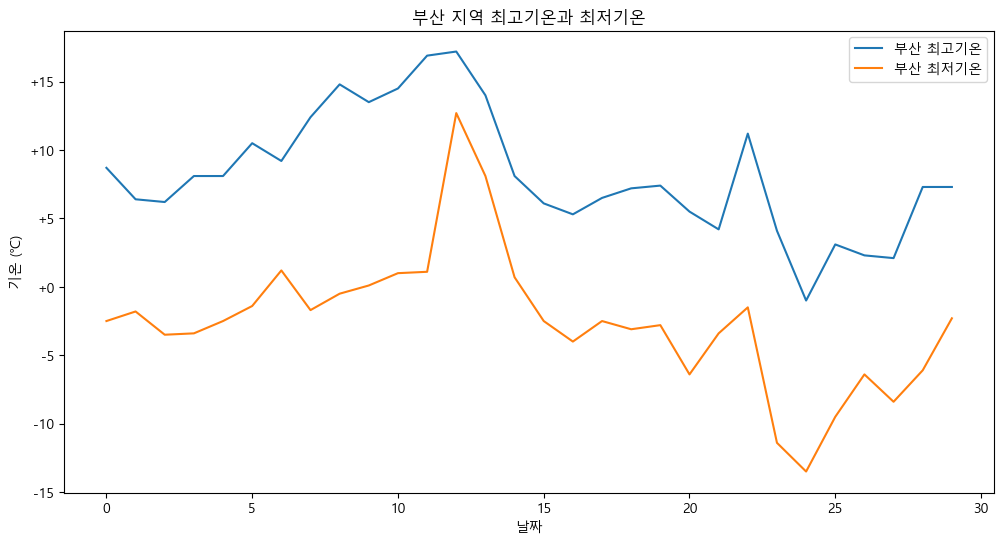

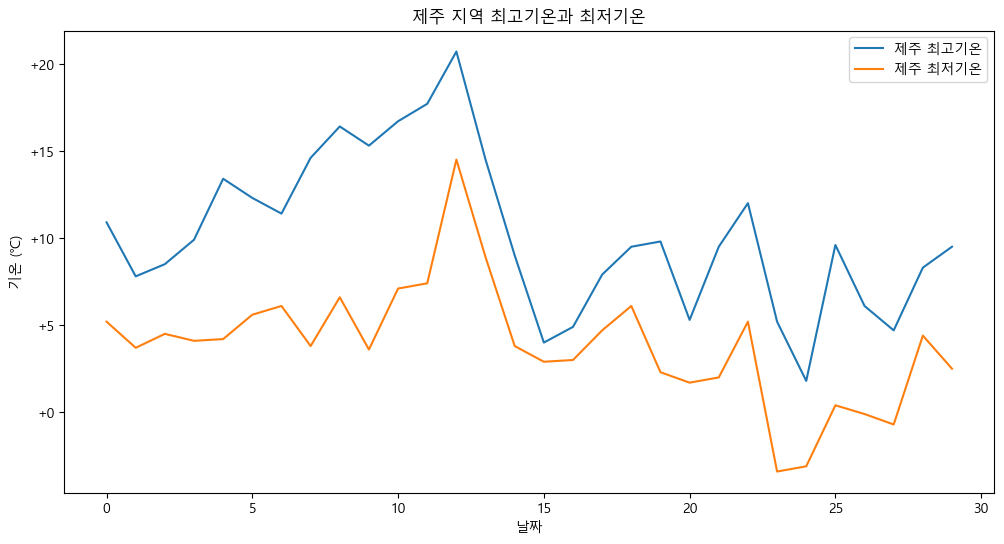

In [14]:
import csv
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

def plot_temperatures(title, 최고기온, 최저기온):
    plt.figure(figsize=(12, 6))
    plt.plot(최고기온, label=f'{title} 최고기온')
    plt.plot(최저기온, label=f'{title} 최저기온')
    plt.title(f'{title} 지역 최고기온과 최저기온')
    plt.xlabel('날짜')
    plt.ylabel('기온 (℃)')
    plt.gca().yaxis.set_major_formatter(StrMethodFormatter('{x:+.0f}'))  # +와 - 기호 표시
    plt.legend()
    plt.show()

fileName = '날씨정보.csv'
dataList = myOpen(fileName)

# 서울, 부산, 제주 지역의 최고기온과 최저기온 추출
seoul_temperatures = extract_temperatures(dataList, '서울')
busan_temperatures = extract_temperatures(dataList, '부산')
jeju_temperatures = extract_temperatures(dataList, '제주')

# Visualization for each region
plot_temperatures('서울', seoul_temperatures['최고기온'], seoul_temperatures['최저기온'])
plot_temperatures('부산', busan_temperatures['최고기온'], busan_temperatures['최저기온'])
plot_temperatures('제주', jeju_temperatures['최고기온'], jeju_temperatures['최저기온'])


In [15]:
import csv

def myOpen(fileName, 구분자=','):
    with open(fileName, 'r', encoding='utf-8') as f:
        return list(csv.reader(f, delimiter=구분자))

def calculate_temperature_difference(max_temps, min_temps):
    return [max_temp - min_temp if max_temp is not None and min_temp is not None else None
            for max_temp, min_temp in zip(max_temps, min_temps)]

fileName = '날씨정보.csv'
dataList = myOpen(fileName)

temperatures = {'서울': {'최고기온': [], '최저기온': []},
                '부산': {'최고기온': [], '최저기온': []},
                '제주': {'최고기온': [], '최저기온': []}}

for row in dataList[1:]:  # 헤더를 제외하고 데이터만 추출
    city = row[0]
    temperatures[city]['최고기온'].append(float(row[2]) if row[2] else None)
    temperatures[city]['최저기온'].append(float(row[3]) if row[3] else None)

temperature_diff = {city: calculate_temperature_difference(temps['최고기온'], temps['최저기온'])
                    for city, temps in temperatures.items()}

# 결과 출력
for city, diff in temperature_diff.items():
    print(f"{city} 지역 기온 차이: {diff}")


서울 지역 기온 차이: [8.1, 7.0, 9.6, 9.0, 9.2, 10.4, 5.199999999999999, 10.0, 8.3, 13.0, 11.2, 13.1, 5.0, 4.6000000000000005, 7.3, 5.6, 6.6, 6.8, 10.3, 9.7, 12.0, 5.4, 11.5, 10.1, 11.9, 5.5, 5.8, 10.6, 12.9, 8.600000000000001]
부산 지역 기온 차이: [11.2, 8.200000000000001, 9.7, 11.5, 10.6, 11.9, 7.999999999999999, 14.1, 15.3, 13.4, 13.5, 15.799999999999999, 4.5, 5.9, 7.3999999999999995, 8.6, 9.3, 9.0, 10.3, 10.2, 11.9, 7.6, 12.7, 15.5, 12.5, 12.6, 8.7, 10.5, 13.399999999999999, 9.6]
제주 지역 기온 차이: [5.7, 4.1, 4.0, 5.800000000000001, 9.2, 6.700000000000001, 5.300000000000001, 10.8, 9.799999999999999, 11.700000000000001, 9.6, 10.299999999999999, 6.199999999999999, 5.6, 5.2, 1.1, 1.9000000000000004, 3.2, 3.4000000000000004, 7.500000000000001, 3.5999999999999996, 7.5, 6.8, 8.6, 4.9, 9.2, 6.199999999999999, 5.4, 3.9000000000000004, 7.0]


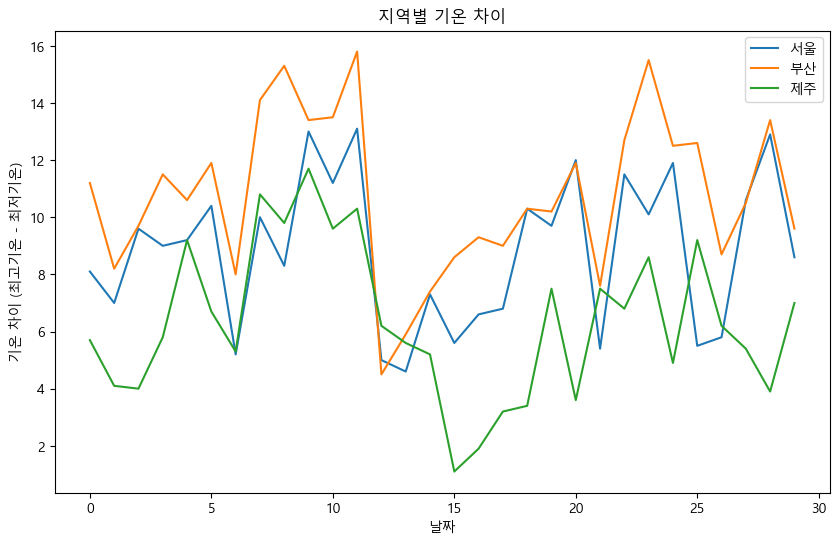

In [16]:

def plot_temperature_difference(city, temperature_diff):
    plt.plot(temperature_diff, label=city)

fileName = '날씨정보.csv'
dataList = myOpen(fileName)

temperatures = {city: {'최고기온': [], '최저기온': []} for city in ['서울', '부산', '제주']}

for row in dataList[1:]:  # 헤더를 제외하고 데이터만 추출
    city, max_temp, min_temp = row[0], float(row[2]) if row[2] else None, float(row[3]) if row[3] else None
    temperatures[city]['최고기온'].append(max_temp)
    temperatures[city]['최저기온'].append(min_temp)

# 시각화
plt.figure(figsize=(10, 6))
[plot_temperature_difference(city, calculate_temperature_difference(temps['최고기온'], temps['최저기온']))
 for city, temps in temperatures.items()]

plt.title('지역별 기온 차이')
plt.xlabel('날짜')
plt.ylabel('기온 차이 (최고기온 - 최저기온)')
plt.legend()
plt.show()
